In [63]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd  # import libary ต่างๆที่จะใช้
from sklearn.datasets import load_boston #Load Dataset from sklearn
from sklearn.preprocessing import PolynomialFeatures


0        6.786041
1        7.147286
2        6.347967
3        6.190085
4        6.478063
           ...   
66519    4.485481
66520    3.605688
66521    3.361233
66522    2.781566
66523    3.804150
Name: Heat, Length: 66524, dtype: float64

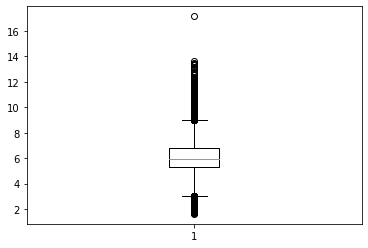

In [2]:
df = pd.read_csv('train2.csv')
#df.plot(kind = 'scatter', x = 'CO2W', y = 'Heat')
#plt.plot()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df_heat=df['Heat'].dropna()

plt.boxplot(df_heat)
# Above Upper bound
# IQR = Q3 - Q1 
df_heat


In [3]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# print(Q1)
# print(Q3)
# print(IQR)

In [4]:
result_dataremove_1 = df[~((df< (Q1 - 3 * IQR)) |(df > (Q3 + 3 * IQR))).any(axis=1)] #extrean outliner
result_dataremove_1.dropna()

<ipython-input-4-d0a6c7d5c87d>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  result_dataremove_1 = df[~((df< (Q1 - 3 * IQR)) |(df > (Q3 + 3 * IQR))).any(axis=1)] #extrean outliner
<ipython-input-4-d0a6c7d5c87d>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  result_dataremove_1 = df[~((df< (Q1 - 3 * IQR)) |(df > (Q3 + 3 * IQR))).any(axis=1)] #extrean outliner


,name,vol,weight,density [g/cm^3],SA,VF,VV,FG,ML,OL1,OL2,TP,CO2/N2,Heat,CO2W
0,mof_unit_1,1116.667429,875.240600,1.301526,1281.139152,0.07899,0.0607,COOH-OEt,3,4,11,pcu,22.864166,6.786041,105.284502
1,mof_unit_2,2769.503842,2211.697211,1.326090,603.610000,0.13794,0.1040,F-OMe,10,44,57,etb,33.616780,7.147286,101.224774
2,mof_unit_3,1089.818728,773.687960,1.178856,788.500000,0.14874,0.1262,OMe-COOH,2,22,24,pcu,19.263726,6.347967,118.987011
3,mof_unit_4,2205.198301,1304.638720,0.982408,1441.530000,0.21814,0.2220,H-SO3H,9,17,24,sra,25.701377,6.190085,187.626004
4,mof_unit_5,1137.800963,901.736120,1.316020,645.692672,0.07778,0.0591,NHMe-OH,2,1,22,pcu,30.001838,6.478063,79.210001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66514,mof_unit_66515,7458.847904,2383.865127,0.530712,3625.060000,0.54382,1.0247,Et-F,3,4,23,nbo,4.248572,3.794780,5.125462
66515,mof_unit_66516,4427.983349,1960.711440,0.735287,2398.380000,0.58292,0.7928,NH2-I,3,7,17,pcu,5.266464,3.758129,6.346203
66518,mof_unit_66519,3763.103252,979.228920,0.432103,5154.420000,0.60648,1.4035,NO2,3,6,25,pcu,4.894371,3.400658,-4.211103
66519,mof_unit_66520,1426.479810,1272.451540,1.481238,1343.620000,0.30190,0.2038,Me-I,3,12,21,pcu,5.867674,4.485481,7.602105


In [5]:
result_dataremove_2 = df[~((df< (Q1 - 1.5* IQR)) |(df > (Q3 + 1.5* IQR))).any(axis=1)] #remove outliner
result_dataremove_2.dropna()

<ipython-input-5-2321c6a0e90a>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  result_dataremove_2 = df[~((df< (Q1 - 1.5* IQR)) |(df > (Q3 + 1.5* IQR))).any(axis=1)] #remove outliner
<ipython-input-5-2321c6a0e90a>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  result_dataremove_2 = df[~((df< (Q1 - 1.5* IQR)) |(df > (Q3 + 1.5* IQR))).any(axis=1)] #remove outliner


,name,vol,weight,density [g/cm^3],SA,VF,VV,FG,ML,OL1,OL2,TP,CO2/N2,Heat,CO2W
0,mof_unit_1,1116.667429,875.240600,1.301526,1281.139152,0.07899,0.0607,COOH-OEt,3,4,11,pcu,22.864166,6.786041,105.284502
2,mof_unit_3,1089.818728,773.687960,1.178856,788.500000,0.14874,0.1262,OMe-COOH,2,22,24,pcu,19.263726,6.347967,118.987011
4,mof_unit_5,1137.800963,901.736120,1.316020,645.692672,0.07778,0.0591,NHMe-OH,2,1,22,pcu,30.001838,6.478063,79.210001
7,mof_unit_8,916.043907,639.111560,1.158537,1685.580000,0.28458,0.2456,Br,2,5,13,pcu,12.684804,5.234732,58.989774
8,mof_unit_9,2228.882339,1422.691820,1.059920,1458.020000,0.24277,0.2291,HCO,4,14,19,acs,37.040424,6.298964,135.587108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66492,mof_unit_66493,4465.403359,1612.781040,0.599741,3723.430000,0.53558,0.8930,NH2-OH,1,11,15,pcu,4.141905,3.850195,4.640137
66506,mof_unit_66507,1185.303201,950.936160,1.332206,1292.340000,0.25262,0.1896,COOH-Br,2,12,19,pcu,7.851065,4.379991,7.483415
66509,mof_unit_66510,2877.936283,1696.658166,0.978955,2056.300000,0.47765,0.4879,F-I,3,8,14,pcu,7.379664,4.309148,5.968178
66515,mof_unit_66516,4427.983349,1960.711440,0.735287,2398.380000,0.58292,0.7928,NH2-I,3,7,17,pcu,5.266464,3.758129,6.346203


In [52]:
traindata = result_dataremove_1.drop(columns =   ['name','ML','OL1','OL2','FG','CO2/N2'])  
traindata = traindata.dropna()

In [53]:

dummy_col = ['TP']

In [54]:
def dummyEncoder(data,columns):
    for i in columns:   
        dummies = pd.get_dummies(data[i])
        data = pd.concat([data,dummies],axis = 1)
        data = data.drop( columns= i)
    return data

In [55]:
traindata = dummyEncoder(traindata,dummy_col)

In [56]:
#  split
x_train = traindata.sample(frac=0.80, random_state=9)
y_train = x_train.pop("CO2W")

# # test split
x_test = traindata.drop(x_train.index)
y_test= x_test.pop("CO2W")



In [57]:
from sklearn.preprocessing import MinMaxScaler as Scaler
sc = Scaler()
x_train_normalize = x_train.astype('float64')
X_sc_train = sc.fit_transform(x_train_normalize)

x_test_normalize = x_test.astype('float64')
X_sc_test = sc.fit_transform(x_test_normalize)

In [59]:
#Linear Regression
lm = LinearRegression()
lm.fit(X_sc_train, y_train)
print('lm score =', lm.score(X_sc_train , y_train))
y_pred = lm.predict(X_sc_test)
# print("Intercept =", lm.intercept)
# print("Coefficient =", lm.coef_)
print('Coefficient of determination: %.2f (The best case is 1)' % r2_score(y_test, y_pred))
print('Root Mean squared error: %.2f' % (np.sqrt(mean_squared_error(y_test, y_pred))))

lm score = 0.5109247767047838
Coefficient of determination: 0.51 (The best case is 1)
Root Mean squared error: 55.23


In [72]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_sc_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
print("polyCoefficient =", lm2.coef_)
print('polylm score =', lm2.score(X_poly, y_train))
y_pred = lm2.predict(poly_reg.fit_transform(X_sc_train))
print('polyCoefficient of determination: %.2f (The best case is 1)' % r2_score(y_test, y_pred))
print('polyRoot Mean squared error: %.2f' % (np.sqrt(mean_squared_error(y_test, y_pred))))



polyCoefficient = [-7.33052849e+08 -1.43464860e+11  2.12091543e+12 -1.05521260e+12
 -1.10530399e+12 -1.95611805e+12 -3.97059998e+11  1.71199755e+12
 -1.97642451e+11 -2.55146882e+11 -1.11733709e+12 -2.23141877e+09
 -1.36245535e+11  1.34972991e+11 -2.00424329e+11  3.49370445e+11
 -2.06416481e+11 -1.69973751e+11  6.34584783e+10 -1.33768160e+11
 -1.50653201e+11  2.29717511e+11  3.77539472e+11  2.69139287e+11
  1.05183412e+11  1.15914508e+11  8.41052478e+10  5.27686736e+10
  1.98672871e+11 -7.63789439e+08  3.43556981e+10 -5.92561171e+09
  2.09056537e+11 -4.10125489e+09  1.77467609e+11 -1.07786596e+12
 -1.00408895e+12 -1.08690674e+12 -1.04604228e+12 -1.19948329e+12
 -1.05228018e+12 -1.01739027e+12  3.13594211e+11 -2.72455275e+08
 -6.19115118e+10 -8.75238253e+10  3.50860633e+11  6.87716556e+11
  5.28491107e+11  5.30940318e+11  5.35880211e+11  8.04863349e+11
  5.21179946e+11  4.74797004e+11  3.40886178e+10  1.83922598e+11
 -6.29078947e+10  2.41088660e+10  4.98980337e+11  5.42954732e+11
  5.511

ValueError: Found input variables with inconsistent numbers of samples: [11307, 45228]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=76bcdf0e-c1a6-4387-bffa-9e411aa48f00' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [100]:
model = Sequential()
model.add(Dense(12, input_dim=(x_train.shape[1]), activation='relu')) # input
model.add(Dense(24, activation='relu')) # hidden 1
model.add(Dense(12, activation='relu')) # hidden 2
model.add(Dense(1, activation='linear')) # output

In [102]:
model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
858/858 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 2/100
858/858 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00A: 0s - loss: nan - accuracy: 0.0000e
Epoch 3/100
858/858 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/100
858/858 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/100
858/858 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/100
858/858 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/100
858/858 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/100
858/858 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/100
858/858 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/100
858/858 [=======================

3        187.626004
6               NaN
10       161.067499
13       133.371121
16        98.109450
            ...    
68579           NaN
68588           NaN
68598           NaN
68606           NaN
68612           NaN
Name: CO2W, Length: 13723, dtype: float64

In [105]:
#Train and linear regression


NameError: name 'train_test_split' is not defined

,vol,weight,density [g/cm^3],SA,VF,VV,Heat,acs,bcu,etb,fof,nbo,pcu,pts,rht,sra,tbo,the
33563,2959.493706,2176.73744,1.221344,709.840000,0.13492,0.1105,5.958377,0,0,0,0,0,0,0,0,1,0,0
56428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0
19585,1673.076925,883.44804,0.876828,1767.010000,0.23341,0.2662,6.453187,0,0,0,0,0,1,0,0,0,0,0
67549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0
62319,4467.252839,1664.82068,0.618837,3779.820000,0.51433,0.8311,3.369033,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34659,1627.166836,1087.40980,1.109713,1709.029620,0.15244,0.1374,6.847791,0,0,0,0,0,1,0,0,0,0,0
14933,2274.713671,1602.03208,1.169483,835.790000,0.15571,0.1331,5.968288,0,0,0,0,0,1,0,0,0,0,0
61024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0
47442,2192.811613,1424.10016,1.078422,1719.731047,0.11918,0.1105,6.742142,0,0,0,0,0,1,0,0,0,0,0


In [ ]:

a = np.asarray([2021,2022])
a = a.reshape(-1,1)
print(a)
y_prediction = lm.predict(a)
print('ทำนายGDPปี 2021 , 2022 =',y_prediction)

#plot Linear
plt.scatter(X,y)
plt.ylabel('Gdp point')
plt.xlabel('Year 19/20')
plt.title('Slope from Linear Regression model')
prd = lm.predict(X_test)
plt.plot(X_test, prd, 'r')

#Polynomial Regression
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 2)

poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lm2 = LinearRegression()
lm2.fit(X_poly, ytrain)
print("polyIntercept =", lm2.intercept)
print("polyCoefficient =", lm2.coef_)
print('polylm score =', lm2.score(X_poly, y_train))
y_pred = lm2.predict(poly_reg.fit_transform(X))
print('polyCoefficient of determination: %.2f (The best case is 1)' % r2_score(y, y_pred))
print('polyRoot Mean squared error: %.2f' % (np.sqrt(mean_squared_error(y, y_pred))))

#plot polynomial
fig2 = plt.figure()
prd1 = lm2 .predict(poly_reg.fit_transform(X))
axes3 = fig2.add_axes([0.1, 0.1, 0.8, 0.8])
axes3.plot(X, lm2.predict(poly_reg.fit_transform(X)))
axes3.set_title('Slope from PolyRegression Model')
axes3.scatter(X,y)

plt.show()